In [1]:
import numpy as np
from datasources import LoadMachineMonitoringData
from matplotlib import pyplot as plt

In [2]:
train, test, validate, meta = LoadMachineMonitoringData()

In [3]:
print('Training data: {}'.format(train.shape))
print('Test data: {}'.format(test.shape))
print('Validation data: {}'.format(validate.shape))

Training data: (1239, 6000, 17)
Test data: (414, 6000, 17)
Validation data: (552, 6000, 17)


In [4]:
time = np.arange(train.shape[1]) * 0.01

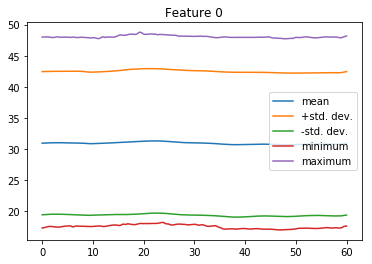

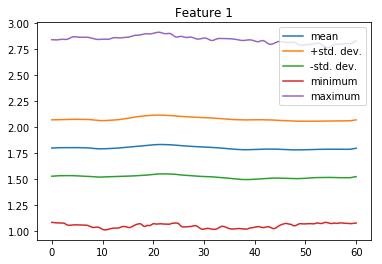

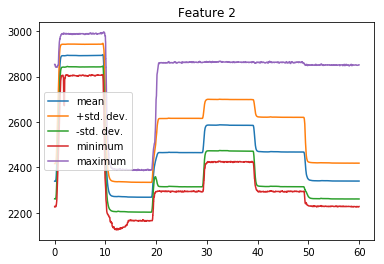

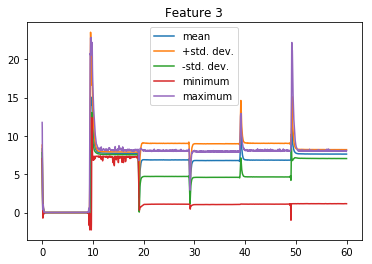

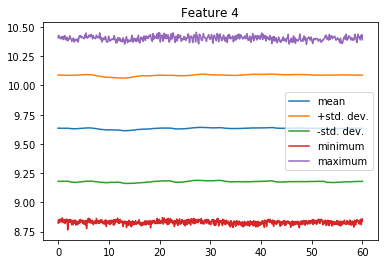

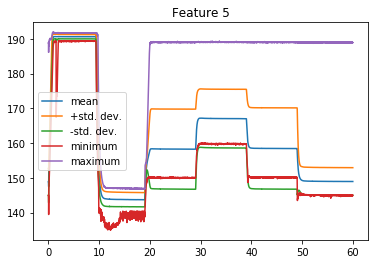

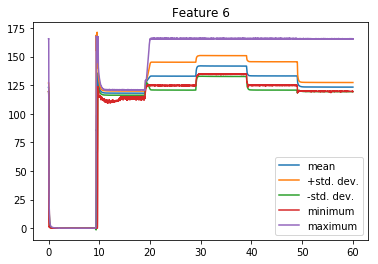

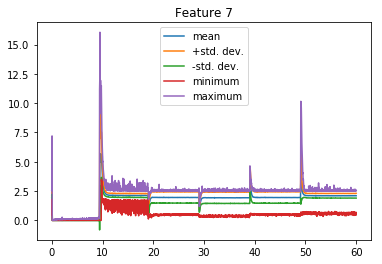

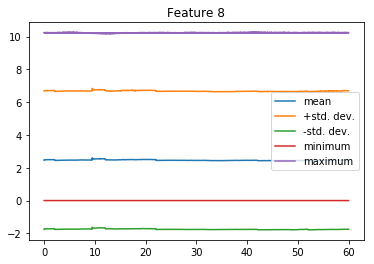

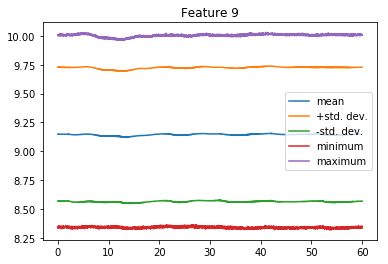

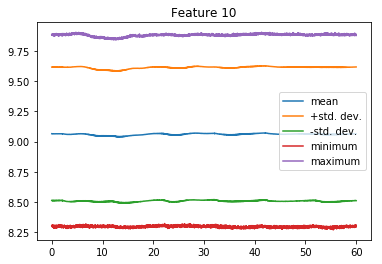

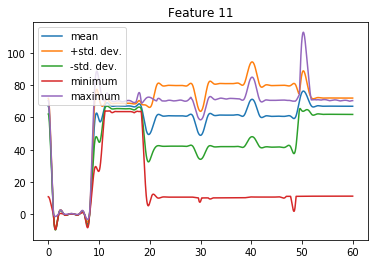

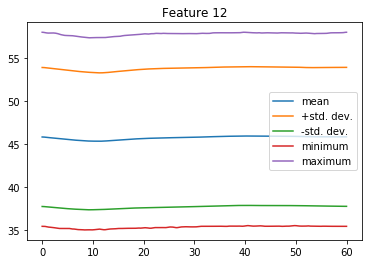

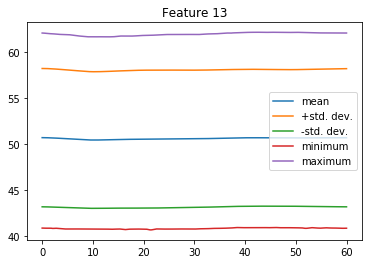

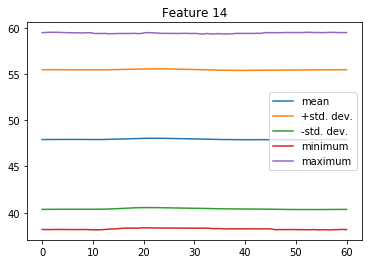

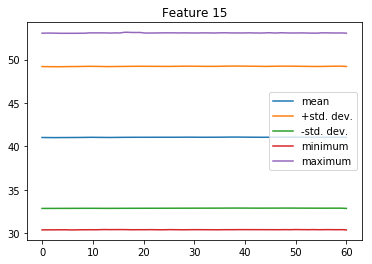

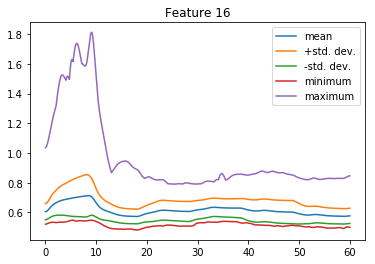

In [5]:
for feature in range(train.shape[-1]):
    means = train[:, :, feature].mean(axis=0)
    stddev = train[:, :, feature].std(axis=0)
    mins = train[:, :, feature].min(axis=0)
    maxs = train[:, :, feature].max(axis=0)
    
    plt.figure()
    plt.title('Feature {}'.format(feature))
    plt.plot(time, means, label='mean')
    plt.plot(time, means + stddev, label='+std. dev.')
    plt.plot(time, means - stddev, label='-std. dev.')
    plt.plot(time, mins, label='minimum')
    plt.plot(time, maxs, label='maximum')
    plt.legend()

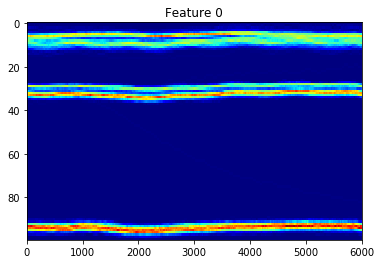

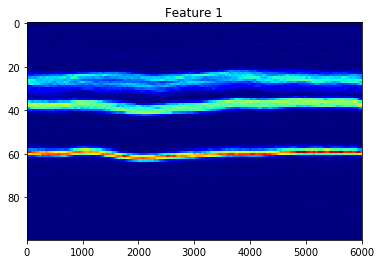

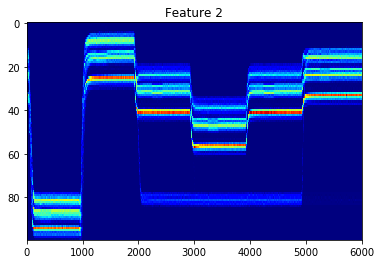

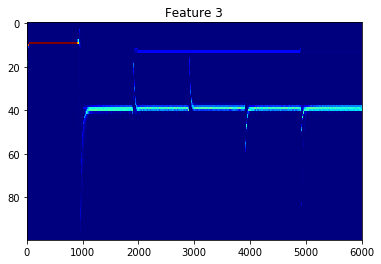

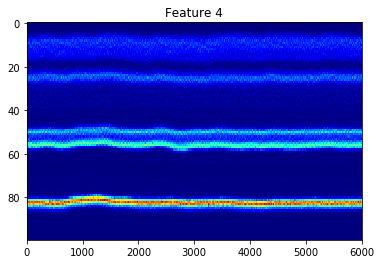

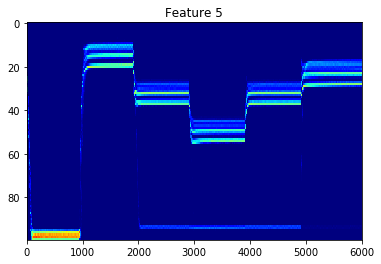

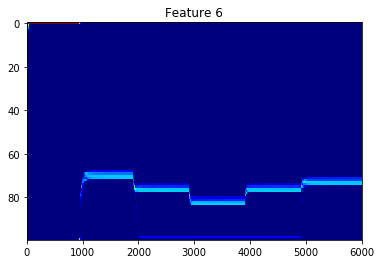

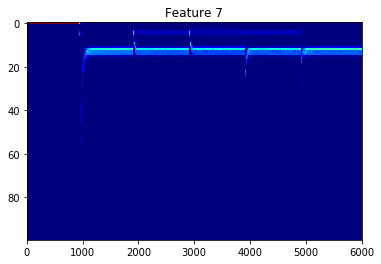

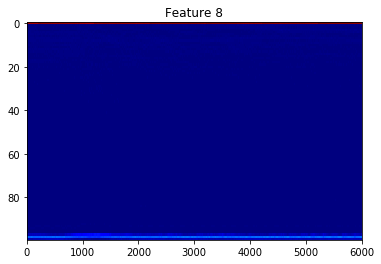

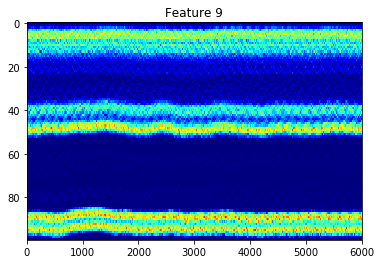

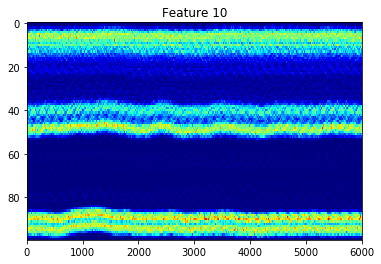

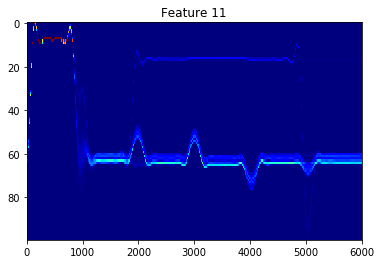

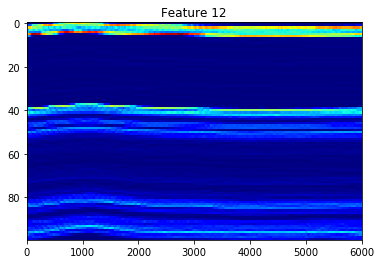

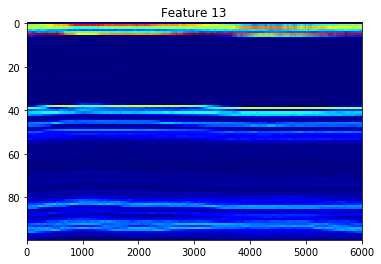

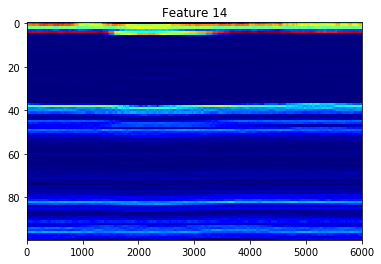

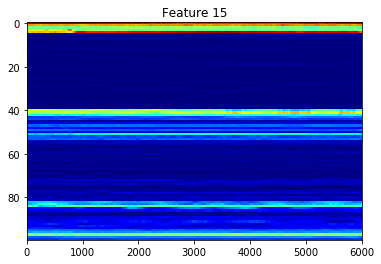

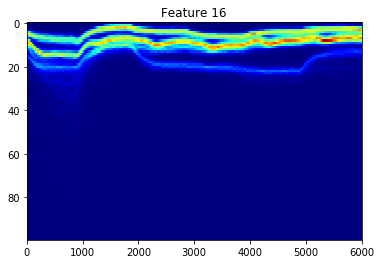

In [6]:
for feature in range(train.shape[-1]):
    minimum = train[:, :, feature].min()
    maximum = train[:, :, feature].max()
    bins = np.linspace(minimum, maximum, 101)
    hist_img = np.zeros((bins.shape[0] - 1, train.shape[1]))
    for time_point in range(train.shape[1]):
        hist_img[:, time_point], _ = np.histogram(train[:, time_point, feature], bins=bins, normed=True)
    plt.figure()
    plt.title('Feature {}'.format(feature))
    plt.imshow(hist_img, cmap=plt.cm.jet, aspect='auto')
    plt.show()

FFT min: -9.962616920471191, max: 1.6803746223449707


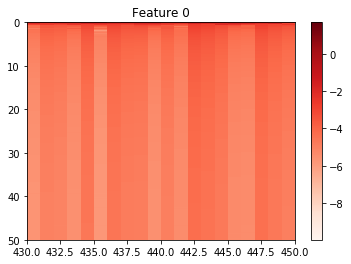

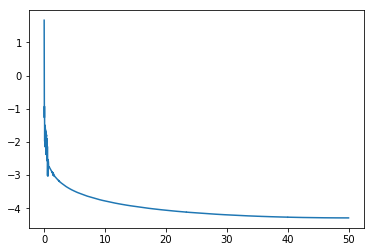

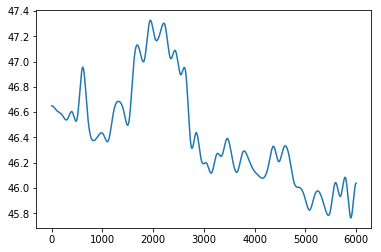

H:\ProgramData\Anaconda3\envs\deeplearninggpu\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


FFT min: -11.1727876663208, max: 0.4533531367778778


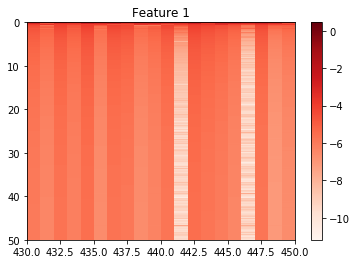

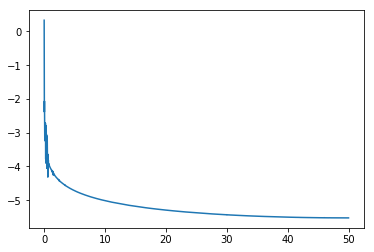

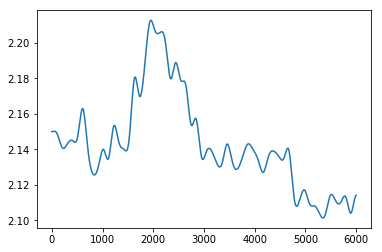

FFT min: -5.643049240112305, max: 3.437852144241333


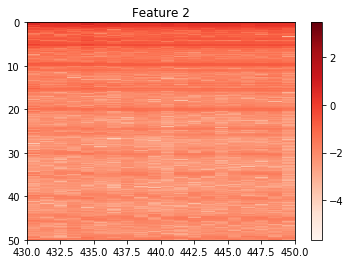

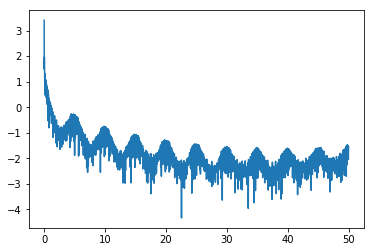

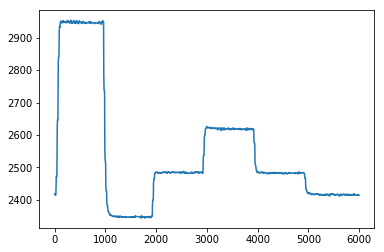

FFT min: -7.949342250823975, max: 0.8273926377296448


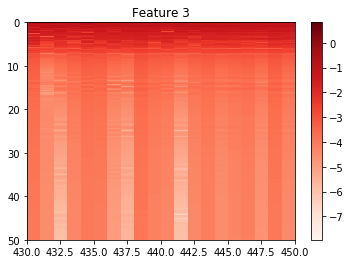

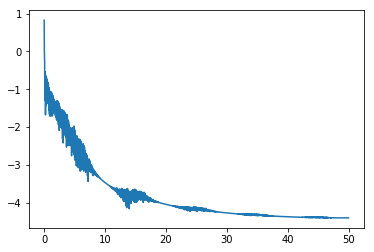

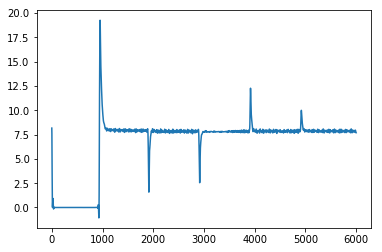

FFT min: -10.572702407836914, max: 1.0171629190444946


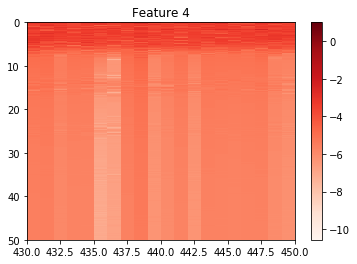

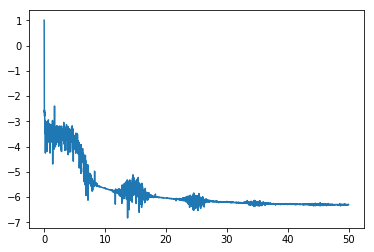

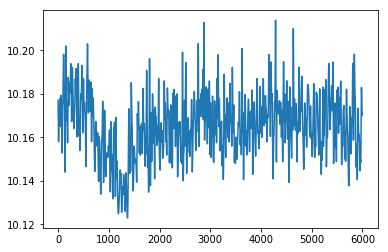

FFT min: -6.9603424072265625, max: 2.257493019104004


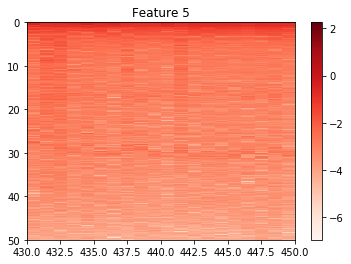

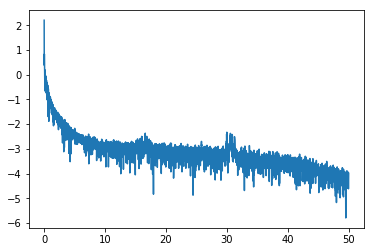

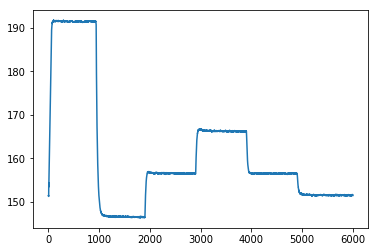

FFT min: -6.637936115264893, max: 2.119220018386841


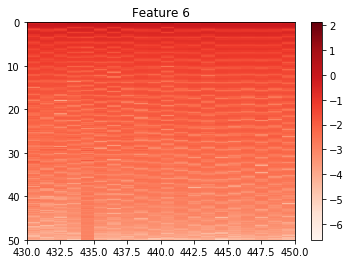

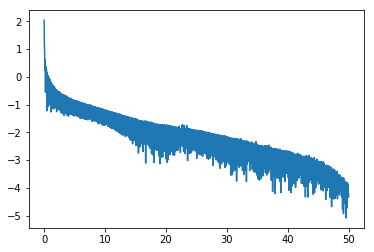

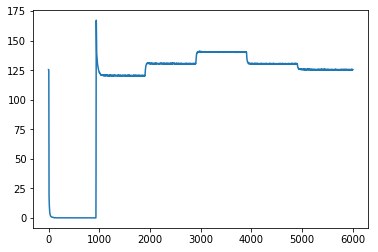

FFT min: -7.08664608001709, max: 0.3060814142227173


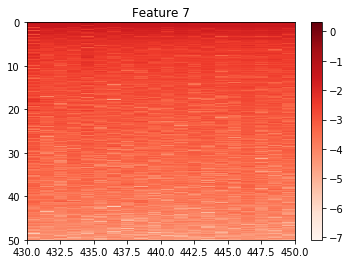

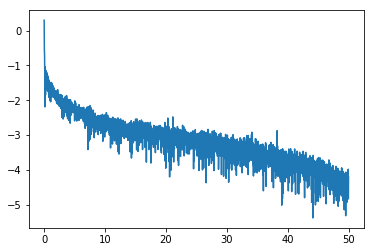

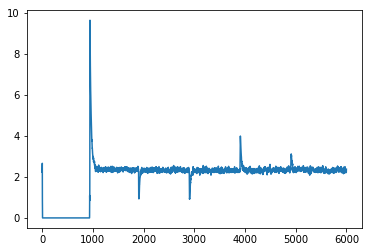

FFT min: -44.85346984863281, max: 1.0088547468185425


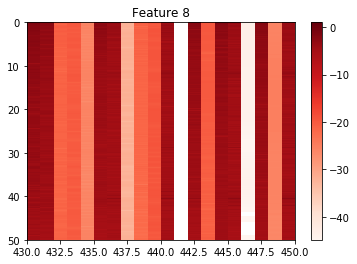

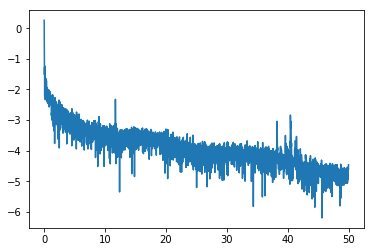

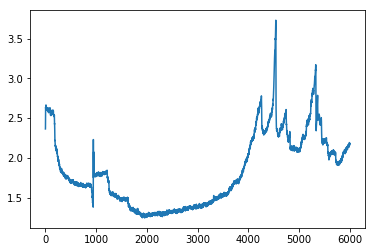

FFT min: -8.306864738464355, max: 0.9990037083625793


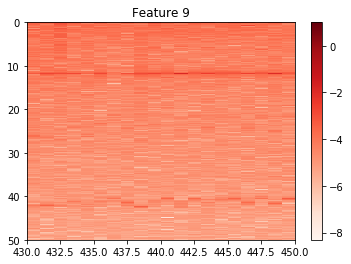

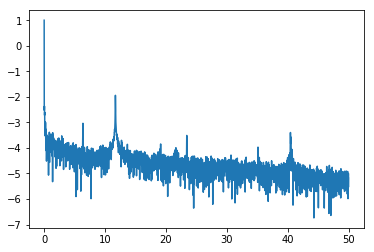

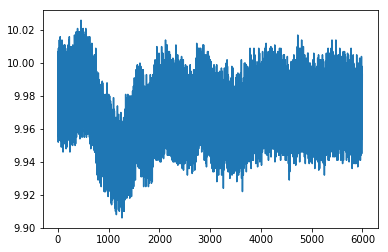

FFT min: -8.441064834594727, max: 0.9936531782150269


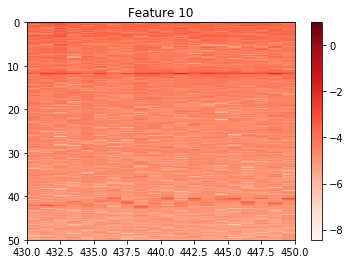

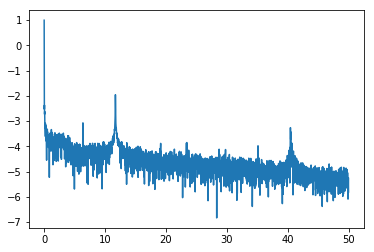

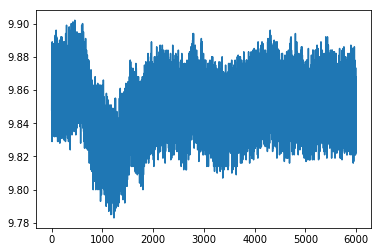

FFT min: -8.583874702453613, max: 1.7824865579605103


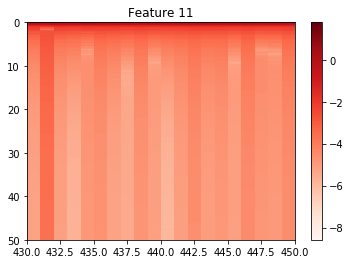

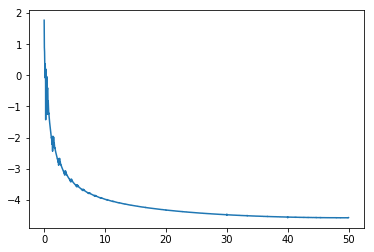

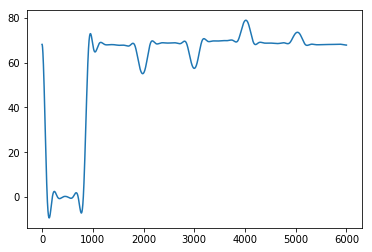

FFT min: -14.013171195983887, max: 1.7618204355239868


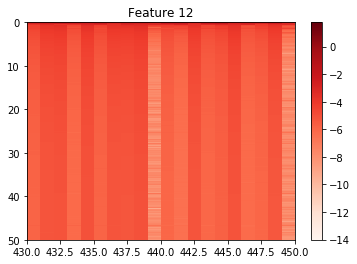

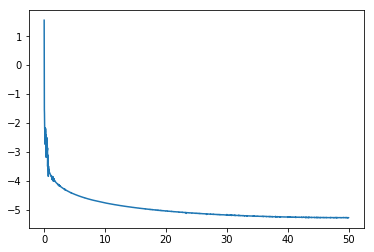

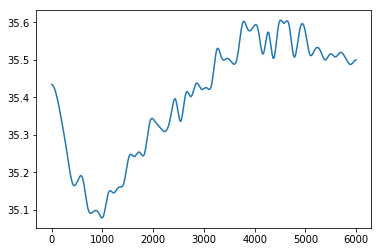

FFT min: -14.013171195983887, max: 1.7920881509780884


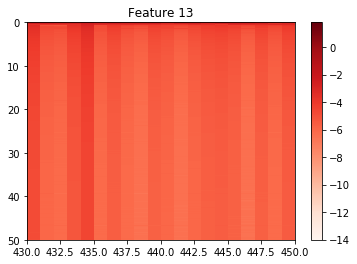

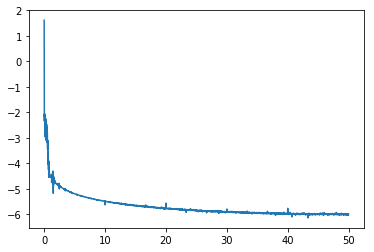

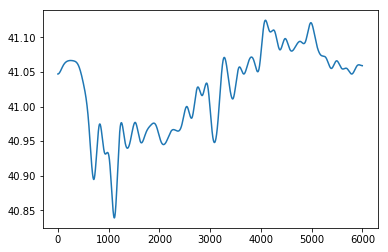

FFT min: -10.939688682556152, max: 1.7739500999450684


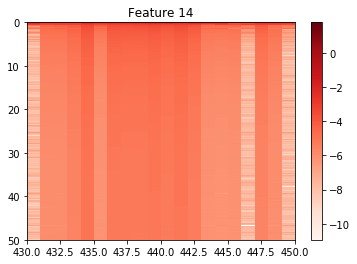

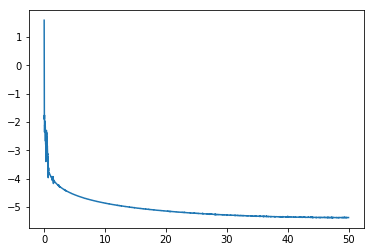

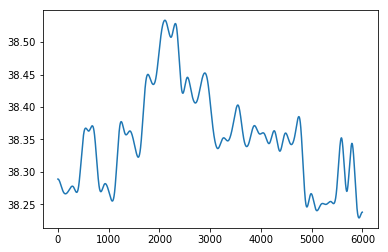

FFT min: -14.000006675720215, max: 1.724776268005371


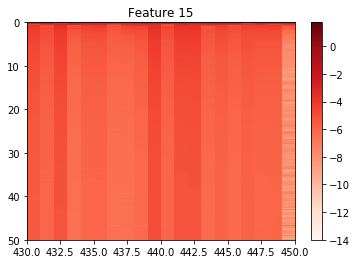

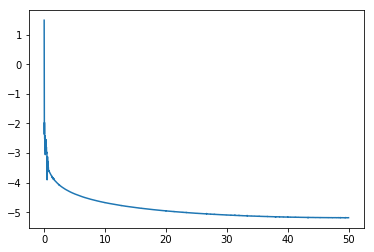

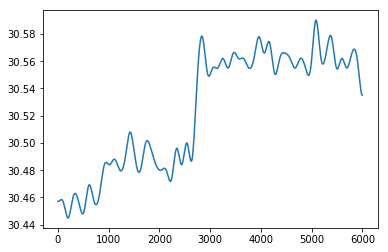

FFT min: -11.604930877685547, max: -0.07942109555006027


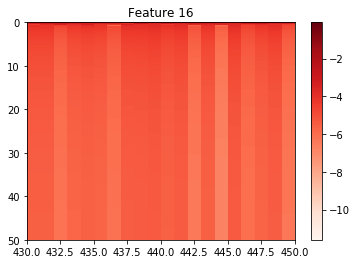

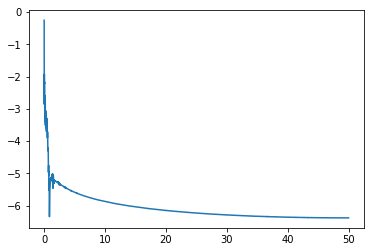

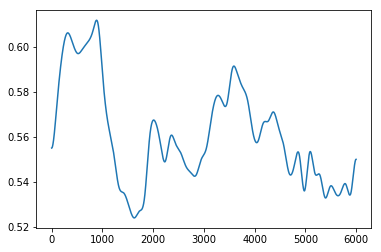

In [16]:
delta_t = 0.01
sampling_freq = 1 / delta_t
num_samples = train.shape[1]
frequencies = np.arange(num_samples) * sampling_freq / num_samples
frequencies = frequencies[range(num_samples // 2)]
fft_img = np.zeros((frequencies.shape[0], train.shape[0], train.shape[2]))
for feature in range(train.shape[-1]):
    for series in range(train.shape[0]):
        fft = np.fft.fft(train[series, :, feature]) / num_samples
        fft = fft[range(num_samples // 2)]
        fft_img[:, series, feature] = np.log10(np.abs(fft))
    fft_min = fft_img[np.isfinite(fft_img[:,:,feature]), feature].min()
    fft_max = fft_img[np.isfinite(fft_img[:,:,feature]), feature].max()
    print('FFT min: {}, max: {}'.format(fft_min, fft_max))
    plt.figure()
    plt.title('Feature {}'.format(feature))
    plot_range = [430, 450] #[0, train.shape[0]]
    plt.imshow(
        fft_img[:, plot_range[0]:plot_range[1], feature], cmap=plt.cm.Reds, aspect='auto',
        vmin=fft_min, vmax=fft_max,
        interpolation='none',
        extent=[plot_range[0], plot_range[1] ,frequencies.max(),frequencies.min()])
    plt.colorbar()
    plt.figure()
    plt.plot(frequencies, fft_img[:, 442, feature])
    plt.show()
    plt.figure()
    plt.plot(train[442, :, feature])
    plt.show()

In [8]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [14]:
@interact
def show_individual_feature(
        series=(0, train.shape[0] - 1, 1),
        feature=(0, train.shape[2] - 1, 1)):
    plt.plot(train[series, :, feature])

interactive(children=(IntSlider(value=619, description='series', max=1238), IntSlider(value=8, description='fe…

In [19]:
@interact
def show_individual_feature_fft(
        series=(0, train.shape[0] - 1, 1),
        feature=(0, train.shape[2] - 1, 1)):
    plt.plot(fft_img[:, series, feature])
    plt.title(meta[feature]['name'])

interactive(children=(IntSlider(value=619, description='series', max=1238), IntSlider(value=8, description='fe…